# Słowem wstępu

Do wykonania poniższych ćwiczeń niezbędne będzie zainstalowanie kilku pakietów rozszerzających zakres funkcjonalności środowiska Python. Zalecam utworzenie wirtualnego środowiska z zastosowaniem np. oprovramowania conda co zapobiegnie nieprzewidzianym ingerencją w OS oraz zapewni możliwość wykonania poniższych zadań. Do dodatkowych pakietów niezbędnych do pracy zaliczymy:
scikit-learn
mordred-descriptor 
mordred
pandas 
matplotlib 
numpy

Do zajęć przyszłych zaleca się również zainstalowanie pakietu keras, który dostarcza funkcjonalności w zakresie budowy modeli z zastosowanie technik uczenia głębokiego:
conda install -c conda-forge keras

In [1]:
#Importujemy niezbędne pakiety narzędzi
"""numpy dostarcza licznych rozwiązań do wykonywania operacji numerycznych jak potęgowanie,
logarytmowanie etc. https://numpy.org/"""
import numpy as np 

"""pandas dostarcza szerego gotowych rozwiązań do analizy danych m.in. gotowe struktury do
przechowywanie danych, szybkie podsumowanie statystyk, usuwanie rekordów, https://pandas.pydata.org/"""

import pandas as pd 

"""Scikit-learn dostarcza szeregu narzędzi umożliwiających manipulacje danymi, wstępną obróbkę danych
budowę modeli predykcyjnych oraz ich ocenę https://scikit-learn.org/stable/"""
from sklearn import * 

"""Matplotlib pozwala na przygotowanie wykresów - będziemy używali tego narzędzia do wizualizacji. 
https://matplotlib.org/"""
import matplotlib.pyplot as plt

"""Mordred to narzędzie pozwalające na tworzenie danych opisujących strukturę i własciwości związków chemicznych.
Takie podejście jest stosowane do generowania danych a odrębny dział nauki który się zajmuje opracowaniem algorytmów
oraz metod obliczeniowych w tym zakresie to tzw. informatyka chemiczna
http://mordred-descriptor.github.io/documentation/v0.1.0/introduction.html """
    
import mordred

"""RdKit to narzędzie z dziedziny informatyki chemicznej umożliwiające obliczanie deskryptorów molekularnych jak i 
tzw. odcisków palca cząsteczek (ang. fingerprint), http://www.rdkit.org/"""

import rdkit

# Wczytanie danych oraz wstępna analiza

In [2]:
"""W pierwszym etapie wczytujemy dane - jeżeli otworzyliśmy program jupyter-notebook katalogu, 
gdzie znajdują się dane, to wystarczy podać nazwę pliku, jeżeli nie to musimy podać pełną ścieżkę dostępu.
W celu zdobycia dodatkowej praktyki polecam przeprowadzić cały proces analizy z bazą danych poszerzoną o
dodatkowe zmienne niezależne: full_solubility_database"""

raw_df = pd.read_csv("raw_solubility_data_2021.csv", sep=",")

In [3]:
"""Zobaczmy wczytaną bazę danych"""
raw_df

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.9581,102.4454,23.0,0.0,0.0,...,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,95.00
1,NoData,NoData,NoData,What?,NaN,NaN,51.9012,13.0,1.0,NaN,...,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,94.10
2,NoData,NoData,NoData,What?,140.569,2.1525,36.8395,9.0,1.0,0.0,...,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,935.00
3,NoData,NoData,NoData,What?,756.226,8.1161,NaN,53.0,6.0,NaN,...,264.0,6.0,0.0,0.0,6.0,120.72,NaN,2.322963e-07,1964.648666,90.00
4,NoData,NoData,NoData,What?,NaN,2.4854,119.0760,31.0,6.0,NaN,...,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,benzyl 2-hydroxybenzoate,InChI=1S/C14H12O3/c15-13-9-5-4-8-12(13)14(16)1...,ZCTQGTTXIYCGGC-UHFFFAOYSA-N,Oc1ccccc1C(=O)OCc2ccccc2,228.247,2.7492,63.6683,17.0,3.0,1.0,...,86.0,2.0,0.0,0.0,2.0,46.53,99.287683,2.012837e+00,505.885589,8.80
10179,tetrabutylstannane,"InChI=1S/4C4H9.Sn/c4*1-3-4-2;/h4*1,3-4H2,2H3;",AFCAKJKUYFLYFK-UHFFFAOYSA-N,CCCC[Sn](CCCC)(CCCC)CCCC,347.175,6.6356,84.6140,17.0,0.0,0.0,...,104.0,0.0,0.0,0.0,0.0,0.00,114.830735,4.391491e+00,116.094393,8.80
10180,magnesium(2+) ion dimethanolate,InChI=1S/2CH3O.Mg/c2*1-2;/h2*1H3;/q2*-1;+2,CRGZYKWWYNQGEC-UHFFFAOYSA-N,[Mg++].C[O-].C[O-],86.373,-2.4278,17.6020,5.0,2.0,0.0,...,28.0,0.0,0.0,0.0,0.0,46.12,47.968388,-1.333333e-08,7.609640,8.75
10181,cadmium,InChI=1S/Cd/q+2,WLZRMCYVCSSEQC-UHFFFAOYSA-N,[Cd++],112.412,-0.0025,0.0000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,27.651029,0.000000e+00,0.000000,8.70


# Trudności na etapie wczytania danych

Jakie trudności mogą się pojawić? Ścieżka dostępu do pliku: można posiłkować się scieżką bezwzględną podając
kompletną ścieżkę dostępu tj /home/adam/..../FileName.csv. Ponadto problemy mogą pojawić się gdy separatorem wartości nie jest znak ","
W takim przypadku należy zdefiniować wartość sep="..."

In [4]:
tmp=pd.read_csv("./dir/raw_solubility_data_2021.csv")
tmp2=pd.read_csv("/home/adam/PulpitPraca/AGH/data2021/DataScience-master/dir/raw_solubility_data_2021.csv")

In [5]:
"""Czytanie i transformacja danych zawierających , jako symbol separujący miejsca dziesiętne"""

tmp3=pd.read_csv("problematic_database_2021.csv")
tmp3.dtypes
tmp3=tmp3.astype('str')
tmp3.dtypes
tmp3[tmp3.columns[4:22]]=tmp3[tmp3.columns[4:22]].apply(lambda x: x.str.replace(',','.'))
tmp3[tmp3.columns[4:22]]=tmp3[tmp3.columns[4:22]].astype('float64')


# Poznajby bliżej bazę i sprawdźmy ewentualne problemy jakie występują

In [6]:
"""Po załadowaniu danych wyświetlmy je np. przez wpisanie nazwy wcześniej utworzonego obiektu."""
raw_df

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.9581,102.4454,23.0,0.0,0.0,...,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,95.00
1,NoData,NoData,NoData,What?,NaN,NaN,51.9012,13.0,1.0,NaN,...,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,94.10
2,NoData,NoData,NoData,What?,140.569,2.1525,36.8395,9.0,1.0,0.0,...,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,935.00
3,NoData,NoData,NoData,What?,756.226,8.1161,NaN,53.0,6.0,NaN,...,264.0,6.0,0.0,0.0,6.0,120.72,NaN,2.322963e-07,1964.648666,90.00
4,NoData,NoData,NoData,What?,NaN,2.4854,119.0760,31.0,6.0,NaN,...,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,benzyl 2-hydroxybenzoate,InChI=1S/C14H12O3/c15-13-9-5-4-8-12(13)14(16)1...,ZCTQGTTXIYCGGC-UHFFFAOYSA-N,Oc1ccccc1C(=O)OCc2ccccc2,228.247,2.7492,63.6683,17.0,3.0,1.0,...,86.0,2.0,0.0,0.0,2.0,46.53,99.287683,2.012837e+00,505.885589,8.80
10179,tetrabutylstannane,"InChI=1S/4C4H9.Sn/c4*1-3-4-2;/h4*1,3-4H2,2H3;",AFCAKJKUYFLYFK-UHFFFAOYSA-N,CCCC[Sn](CCCC)(CCCC)CCCC,347.175,6.6356,84.6140,17.0,0.0,0.0,...,104.0,0.0,0.0,0.0,0.0,0.00,114.830735,4.391491e+00,116.094393,8.80
10180,magnesium(2+) ion dimethanolate,InChI=1S/2CH3O.Mg/c2*1-2;/h2*1H3;/q2*-1;+2,CRGZYKWWYNQGEC-UHFFFAOYSA-N,[Mg++].C[O-].C[O-],86.373,-2.4278,17.6020,5.0,2.0,0.0,...,28.0,0.0,0.0,0.0,0.0,46.12,47.968388,-1.333333e-08,7.609640,8.75
10181,cadmium,InChI=1S/Cd/q+2,WLZRMCYVCSSEQC-UHFFFAOYSA-N,[Cd++],112.412,-0.0025,0.0000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,27.651029,0.000000e+00,0.000000,8.70


In [7]:
"""Zobaczmy jakie metody możemy wywołać na tym obiekcie, wpisując nazwę obiektu oraz "kropkę" np "raw_df."" i wciskając
"Tab" wyświetlą się metody jakie możemy zastosować dla naszego obiektu. Ponadto po wpisaniu nazwy metody, mamy 
możliwość podglądu dokumentacji ("Shift+Tab"), gdzie znajdują się informacje o jej działaniu oraz parametrach"""

"""W ramach ćwiczenia, proszę zmodyfikować liczbę wyświetlanych rekordów do 3"""

raw_df.head() 

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.9581,102.4454,23.0,0.0,0.0,...,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,95.0
1,NoData,NoData,NoData,What?,NaN,NaN,51.9012,13.0,1.0,NaN,...,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,94.1
2,NoData,NoData,NoData,What?,140.569,2.1525,36.8395,9.0,1.0,0.0,...,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,935.0
3,NoData,NoData,NoData,What?,756.226,8.1161,NaN,53.0,6.0,NaN,...,264.0,6.0,0.0,0.0,6.0,120.72,NaN,2.322963e-07,1964.648666,90.0
4,NoData,NoData,NoData,What?,NaN,2.4854,119.0760,31.0,6.0,NaN,...,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,9.2


In [8]:
"""Metoda *.tail pozwala wyświetlić n ostatnich rekordów z obiektu DataFrame

Proszę zmodyfikować liczbę wyświetlanych rekodwów do 7"""

raw_df.tail()


,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
10178,benzyl 2-hydroxybenzoate,InChI=1S/C14H12O3/c15-13-9-5-4-8-12(13)14(16)1...,ZCTQGTTXIYCGGC-UHFFFAOYSA-N,Oc1ccccc1C(=O)OCc2ccccc2,228.247,2.7492,63.6683,17.0,3.0,1.0,...,86.0,2.0,0.0,0.0,2.0,46.53,99.287683,2.012837e+00,505.885589,8.80
10179,tetrabutylstannane,"InChI=1S/4C4H9.Sn/c4*1-3-4-2;/h4*1,3-4H2,2H3;",AFCAKJKUYFLYFK-UHFFFAOYSA-N,CCCC[Sn](CCCC)(CCCC)CCCC,347.175,6.6356,84.6140,17.0,0.0,0.0,...,104.0,0.0,0.0,0.0,0.0,0.00,114.830735,4.391491e+00,116.094393,8.80
10180,magnesium(2+) ion dimethanolate,InChI=1S/2CH3O.Mg/c2*1-2;/h2*1H3;/q2*-1;+2,CRGZYKWWYNQGEC-UHFFFAOYSA-N,[Mg++].C[O-].C[O-],86.373,-2.4278,17.6020,5.0,2.0,0.0,...,28.0,0.0,0.0,0.0,0.0,46.12,47.968388,-1.333333e-08,7.609640,8.75
10181,cadmium,InChI=1S/Cd/q+2,WLZRMCYVCSSEQC-UHFFFAOYSA-N,[Cd++],112.412,-0.0025,0.0000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,27.651029,0.000000e+00,0.000000,8.70
10182,"6,8-bis(phenylamino)naphthalene-1-sulfonic acid","InChI=1S/C22H18N2O3S/c25-28(26,27)21-13-7-8-16...",USFSONWQSVCJBO-UHFFFAOYSA-N,O[S](=O)(=O)c1cccc2cc(Nc3ccccc3)cc(Nc4ccccc4)c12,390.464,5.5737,113.2120,28.0,4.0,3.0,...,140.0,4.0,0.0,0.0,4.0,78.43,162.955616,1.900271e+00,1224.864054,8.30


In [9]:
"""Metoda describe() pozwala na wyświetlenie podstawowych statystyk dla naszego obiektu jak ilość rekordów, średnią, std
wartość minimalną i maksymalną dla każdej kolumny"""

raw_df.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
count,10139.000000,10138.000000,10145.000000,10140.000000,10143.000000,10127.000000,10132.000000,10142.000000,10149.000000,10138.000000,10143.000000,10143.000000,10145.000000,10137.000000,10143.000000,10147.000000,10145.000000,1.014900e+04
mean,267.370676,1.996334,66.958742,17.420513,3.491669,1.103881,5.195124,4.118813,94.618780,1.065299,0.293306,0.446515,1.515525,62.379284,109.111842,2.387585,468.219055,9.887761e+04
std,185.775189,3.538997,46.969114,12.358508,3.517837,1.487811,4.745765,5.809162,65.513057,1.311906,0.879801,1.052962,1.646913,63.553968,77.040497,1.098074,549.479665,5.790308e+05
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000,4.400463e-08
25%,162.276000,0.626340,40.659000,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.653366,2.000000,162.877124,1.229895e+01
50%,228.408000,1.964800,58.661500,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.440000,93.259983,2.538214,350.944950,5.199340e+02
75%,321.373000,3.440760,81.995900,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.447052,1.167194e+04
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708,3.770000e+07


In [10]:
"""Warto zorientować się jakie mamy nazwy kolumn, można to zastosować do selekcji nowych podzbiorów określając 
numery indeksów np. raw_df[raw_df.columns[1]]"""
raw_df.columns
raw_df.columns[1:2]

"""W celu wyświetlenia rekordów, które spełniają określony warunek np. wartość liczbową w określonej kolumnie możemy 
wywołać poniższy kod"""
raw_df[raw_df.solubility_mg_L>1000]

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
12,NoData,NoData,NoData,What?,733.002,12.05424,225.4848,NaN,6.0,6.0,...,288.0,6.0,NaN,0.0,6.0,NaN,NaN,3.240000e-07,1804.418547,7669.999999
30,NoData,NoData,NoData,What?,33.030,-0.66570,NaN,NaN,2.0,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,12.462472,1.000000e+00,2.000000,5700.000000
32,NoData,NoData,NoData,What?,499.717,6.85320,NaN,35.0,4.0,NaN,...,192.0,NaN,0.0,0.0,3.0,77.43,211.312915,2.560000e-07,NaN,1140.000000
41,NoData,NoData,NoData,What?,128.171,1.65130,34.2108,9.0,1.0,NaN,...,52.0,0.0,1.0,NaN,1.0,37.30,54.878828,2.312192e+00,103.483778,4600.000000
42,NoData,NoData,NoData,What?,NaN,-14.30130,212.8884,69.0,26.0,3.0,...,340.0,5.0,NaN,NaN,NaN,433.56,NaN,4.760995e-06,3615.453397,441170.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,"1,3-divinylimidazolidin-2-one",InChI=1S/C7H10N2O/c1-3-8-5-6-9(4-2)7(8)10/h3-4...,HMYBDZFSXBJDGL-UHFFFAOYSA-N,C=CN1CCN(C=C)C1=O,138.170,1.01100,39.2020,10.0,1.0,0.0,...,54.0,0.0,1.0,1.0,1.0,23.55,60.225056,2.655338e+00,158.444920,9650.000001
10129,2-ethyl-3-hydroxy-4H-pyran-4-one,"InChI=1S/C7H8O3/c1-2-6-7(9)5(8)3-4-10-6/h3-4,9...",YIKYNHJUKRTCJL-UHFFFAOYSA-N,CCC1=C(O)C(=O)C=CO1,140.138,0.90780,36.0208,10.0,3.0,1.0,...,54.0,1.0,0.0,0.0,1.0,50.44,57.921860,3.278727e+00,274.424863,9345.400000
10151,ethanethiol,"InChI=1S/C2H6S/c1-2-3/h3H,2H2,1H3",DNJIEGIFACGWOD-UHFFFAOYSA-N,CCS,62.137,0.93610,19.5270,3.0,1.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.00,26.259260,1.632993e+00,2.754888,8860.000000
10154,"(1S,2S)-1-methyl-4-(propan-2-yl)-7-oxabicyclo[...","InChI=1S/C10H18O2/c1-7(2)10-5-4-9(3,12-10)8(11...",IFQZADDJTDGGCP-AEJSXWLSSA-N,CC(C)[C@@]12CC[C@@](C)(O1)[C@@H](O)C2,170.252,1.71490,46.9168,12.0,2.0,1.0,...,70.0,0.0,2.0,2.0,2.0,29.46,73.919847,2.250420e+00,202.015260,87700.000007


In [11]:
"""Wyniki możemy również wyświetlać teracyjnie przechodząc przez każdy rekord. Poniższy przykład wypisuje wartość columny
MolWt przedstawiającej masę molową związku. Proszę wyświetlić dodatkowo nazwę związku chemicznego."""

for i, s in raw_df.iterrows():
    print("RowNo", i)
    print(s["MolWt"])

RowNo 0
392.51000000000016
RowNo 1
nan
RowNo 2
140.569
RowNo 3
756.2260000000003
RowNo 4
nan
RowNo 5
118.179
RowNo 6
170.25199999999995
RowNo 7
376.4490000000001
RowNo 8
218.202
RowNo 9
342.391
RowNo 10
nan
RowNo 11
nan
RowNo 12
733.0020000000003
RowNo 13
206.285
RowNo 14
260.255
RowNo 15
154.253
RowNo 16
214.648
RowNo 17
660.2820000000003
RowNo 18
nan
RowNo 19
nan
RowNo 20
218.362
RowNo 21
136.238
RowNo 22
202.138
RowNo 23
150.47199999999995
RowNo 24
181.235
RowNo 25
604.1740000000002
RowNo 26
195.476
RowNo 27
136.238
RowNo 28
nan
RowNo 29
258.402
RowNo 30
33.03
RowNo 31
192.21400000000003
RowNo 32
499.71700000000016
RowNo 33
184.279
RowNo 34
570.3679999999998
RowNo 35
nan
RowNo 36
220.356
RowNo 37
158.24399999999994
RowNo 38
95.94
RowNo 39
nan
RowNo 40
nan
RowNo 41
128.17100000000002
RowNo 42
nan
RowNo 43
344.5019999999999
RowNo 44
658.8910000000002
RowNo 45
426.3480000000001
RowNo 46
252.364
RowNo 47
152.237
RowNo 48
nan
RowNo 49
868.35
RowNo 50
189.324
RowNo 51
256.342
RowNo 52
298

RowNo 464
222.372
RowNo 465
1588.4030000000002
RowNo 466
197.281
RowNo 467
133.15400000000002
RowNo 468
234.189
RowNo 469
1165.0559999999996
RowNo 470
194.18599999999995
RowNo 471
407.98900000000015
RowNo 472
170.25199999999995
RowNo 473
184.113
RowNo 474
196.115
RowNo 475
216.312
RowNo 476
172.26799999999992
RowNo 477
324.33600000000007
RowNo 478
146.71099999999996
RowNo 479
204.26900000000003
RowNo 480
209.201
RowNo 481
199.38199999999995
RowNo 482
230.304
RowNo 483
220.356
RowNo 484
260.4869999999999
RowNo 485
200.322
RowNo 486
422.9200000000001
RowNo 487
397.931
RowNo 488
204.335
RowNo 489
148.24899999999997
RowNo 490
208.345
RowNo 491
136.238
RowNo 492
220.356
RowNo 493
186.295
RowNo 494
461.84000000000015
RowNo 495
284.48799999999994
RowNo 496
236.399
RowNo 497
198.35
RowNo 498
222.372
RowNo 499
296.55200000000013
RowNo 500
316.3600000000001
RowNo 501
201.313
RowNo 502
852.9889999999998
RowNo 503
197.193
RowNo 504
248.94199999999995
RowNo 505
519.3550000000006
RowNo 506
154.209
R

RowNo 868
282.343
RowNo 869
943.7369999999994
RowNo 870
292.356
RowNo 871
88.22599999999998
RowNo 872
639.4540000000002
RowNo 873
186.295
RowNo 874
203.024
RowNo 875
170.20799999999997
RowNo 876
272.388
RowNo 877
176.215
RowNo 878
118.132
RowNo 879
190.286
RowNo 880
192.001
RowNo 881
150.22099999999998
RowNo 882
194.211
RowNo 883
302.4140000000001
RowNo 884
187.626
RowNo 885
207.2
RowNo 886
158.241
RowNo 887
221.322
RowNo 888
202.297
RowNo 889
157.438
RowNo 890
165.403
RowNo 891
496.4300000000002
RowNo 892
182.131
RowNo 893
924.9339999999997
RowNo 894
230.304
RowNo 895
196.334
RowNo 896
184.32299999999995
RowNo 897
364.101
RowNo 898
480.7340000000003
RowNo 899
198.306
RowNo 900
284.396
RowNo 901
196.29
RowNo 902
188.27000000000004
RowNo 903
430.907
RowNo 904
181.449
RowNo 905
850.8140000000003
RowNo 906
196.202
RowNo 907
149.894
RowNo 908
326.0540000000001
RowNo 909
154.25299999999996
RowNo 910
354.26200000000017
RowNo 911
183.163
RowNo 912
281.093
RowNo 913
130.06300000000002
RowNo 91

RowNo 1252
201.234
RowNo 1253
236.27
RowNo 1254
236.35800000000003
RowNo 1255
665.2410000000002
RowNo 1256
141.844
RowNo 1257
580.8060000000004
RowNo 1258
453.4110000000002
RowNo 1259
184.323
RowNo 1260
212.37699999999995
RowNo 1261
192.302
RowNo 1262
186.403
RowNo 1263
298.426
RowNo 1264
453.4110000000002
RowNo 1265
300.266
RowNo 1266
916.1249999999992
RowNo 1267
418.14900000000017
RowNo 1268
438.63300000000015
RowNo 1269
161.94499999999996
RowNo 1270
222.243
RowNo 1271
260.34000000000003
RowNo 1272
244.246
RowNo 1273
1991.601
RowNo 1274
240.21400000000003
RowNo 1275
212.336
RowNo 1276
361.1580000000003
RowNo 1277
351.41
RowNo 1278
315.587
RowNo 1279
302.4550000000001
RowNo 1280
204.357
RowNo 1281
238.374
RowNo 1282
234.298
RowNo 1283
340.1760000000001
RowNo 1284
308.293
RowNo 1285
325.809
RowNo 1286
441.99400000000014
RowNo 1287
238.374
RowNo 1288
366.4789999999999
RowNo 1289
180.247
RowNo 1290
200.59
RowNo 1291
276.33900000000006
RowNo 1292
242.403
RowNo 1293
487.64700000000016
RowN

RowNo 1707
130.209
RowNo 1708
218.206
RowNo 1709
88.06200000000003
RowNo 1710
130.099
RowNo 1711
210.665
RowNo 1712
511.5350000000003
RowNo 1713
92.525
RowNo 1714
257.0849999999999
RowNo 1715
375.2980000000002
RowNo 1716
181.238
RowNo 1717
114.10099999999998
RowNo 1718
196.331
RowNo 1719
599.2430000000003
RowNo 1720
691.6550000000003
RowNo 1721
677.6240000000004
RowNo 1722
209.267
RowNo 1723
1834.2740000000006
RowNo 1724
42.39400000000001
RowNo 1725
130.211
RowNo 1726
157.59699999999995
RowNo 1727
146.18599999999995
RowNo 1728
131.18900000000002
RowNo 1729
171.28399999999996
RowNo 1730
158.154
RowNo 1731
270.322
RowNo 1732
230.265
RowNo 1733
441.4680000000001
RowNo 1734
306.3820000000001
RowNo 1735
380.17200000000014
RowNo 1736
108.99
RowNo 1737
142.154
RowNo 1738
113.076
RowNo 1739
830.6790000000003
RowNo 1740
176.25599999999997
RowNo 1741
194.116
RowNo 1742
160.213
RowNo 1743
248.713
RowNo 1744
256.389
RowNo 1745
99.814
RowNo 1746
160.213
RowNo 1747
146.966
RowNo 1748
877.46800000000

RowNo 2218
389.13000000000017
RowNo 2219
124.096
RowNo 2220
146.14600000000004
RowNo 2221
131.17499999999998
RowNo 2222
217.652
RowNo 2223
98.05699999999996
RowNo 2224
105.988
RowNo 2225
768.7020000000003
RowNo 2226
58.08
RowNo 2227
680.7220000000002
RowNo 2228
248.363
RowNo 2229
121.18299999999996
RowNo 2230
431.7980000000003
RowNo 2231
215.24900000000002
RowNo 2232
179.04999999999995
RowNo 2233
121.183
RowNo 2234
764.6189999999998
RowNo 2235
165.236
RowNo 2236
248.153
RowNo 2237
151.165
RowNo 2238
355.52500000000015
RowNo 2239
241.295
RowNo 2240
164.204
RowNo 2241
120.38410177799999
RowNo 2242
207.016
RowNo 2243
285.2999999999999
RowNo 2244
85.07799999999997
RowNo 2245
246.3269999999999
RowNo 2246
163.003
RowNo 2247
1098.9510000000002
RowNo 2248
114.144
RowNo 2249
1333.0979999999995
RowNo 2250
254.267
RowNo 2251
128.171
RowNo 2252
171.28400000000005
RowNo 2253
114.188
RowNo 2254
100.161
RowNo 2255
154.165
RowNo 2256
214.30499999999995
RowNo 2257
129.247
RowNo 2258
300.35100000000006


126.19899999999996
RowNo 2659
110.156
RowNo 2660
128.08700000000002
RowNo 2661
136.622
RowNo 2662
136.19799999999998
RowNo 2663
261.281
RowNo 2664
81.11800000000002
RowNo 2665
147.201
RowNo 2666
196.29
RowNo 2667
152.149
RowNo 2668
194.183
RowNo 2669
178.61499999999995
RowNo 2670
86.134
RowNo 2671
238.008
RowNo 2672
104.174
RowNo 2673
705.6460000000003
RowNo 2674
336.20800000000014
RowNo 2675
61.040000000000006
RowNo 2676
336.3720000000001
RowNo 2677
98.14499999999997
RowNo 2678
174.204
RowNo 2679
90.122
RowNo 2680
88.10600000000002
RowNo 2681
99.133
RowNo 2682
74.083
RowNo 2683
122.189
RowNo 2684
210.138
RowNo 2685
106.121
RowNo 2686
198.222
RowNo 2687
153.653
RowNo 2688
104.153
RowNo 2689
119.164
RowNo 2690
150.174
RowNo 2691
149.19
RowNo 2692
80.51400000000002
RowNo 2693
85.06200000000003
RowNo 2694
116.116
RowNo 2695
71.07900000000002
RowNo 2696
84.118
RowNo 2697
73.13900000000002
RowNo 2698
74.12299999999998
RowNo 2699
93.129
RowNo 2700
78.13600000000002
RowNo 2701
103.165
RowNo 2

191.094
RowNo 3079
307.62
RowNo 3080
58.08
RowNo 3081
157.213
RowNo 3082
79.904
RowNo 3083
351.46300000000014
RowNo 3084
375.52900000000017
RowNo 3085
133.14700000000002
RowNo 3086
601.9240000000002
RowNo 3087
102.133
RowNo 3088
228.137
RowNo 3089
206.198
RowNo 3090
100.117
RowNo 3091
132.115
RowNo 3092
457.1610000000002
RowNo 3093
248.163
RowNo 3094
115.18
RowNo 3095
166.19799999999995
RowNo 3096
194.227
RowNo 3097
118.176
RowNo 3098
165.18900000000005
RowNo 3099
32.042
RowNo 3100
209.242
RowNo 3101
120.173
RowNo 3102
130.143
RowNo 3103
203.669
RowNo 3104
118.176
RowNo 3105
548.0660000000003
RowNo 3106
400.3910000000001
RowNo 3107
351.80200000000013
RowNo 3108
264.328
RowNo 3109
271.40099999999995
RowNo 3110
158.241
RowNo 3111
188.182
RowNo 3112
240.213
RowNo 3113
160.25999999999996
RowNo 3114
168.62299999999996
RowNo 3115
221.114
RowNo 3116
221.259
RowNo 3117
86.93599999999998
RowNo 3118
119.16399999999996
RowNo 3119
376.205
RowNo 3120
116.208
RowNo 3121
100.118
RowNo 3122
297.267
Ro

345.34500000000014
RowNo 3509
501.061
RowNo 3510
270.291
RowNo 3511
381.2180000000001
RowNo 3512
405.33600000000007
RowNo 3513
925.8259999999997
RowNo 3514
416.78100000000006
RowNo 3515
310.434
RowNo 3516
381.2180000000001
RowNo 3517
340.339
RowNo 3518
342.5200000000002
RowNo 3519
460.8770000000002
RowNo 3520
529.1810000000003
RowNo 3521
227.076
RowNo 3522
144.24
RowNo 3523
74.932
RowNo 3524
1259.358
RowNo 3525
454.48600000000016
RowNo 3526
426.4320000000001
RowNo 3527
382.33600000000007
RowNo 3528
828.9269999999997
RowNo 3529
338.48800000000006
RowNo 3530
499.48700000000014
RowNo 3531
717.61
RowNo 3532
448.84200000000055
RowNo 3533
312.3280000000001
RowNo 3534
937.0679999999996
RowNo 3535
565.0290000000002
RowNo 3536
368.4730000000001
RowNo 3537
386.36400000000015
RowNo 3538
572.5810000000002
RowNo 3539
331.5030000000001
RowNo 3540
466.3240000000001
RowNo 3541
696.926
RowNo 3542
791.3839999999997
RowNo 3543
430.71700000000016
RowNo 3544
416.69000000000017
RowNo 3545
663.0809999999999


RowNo 3964
114.188
RowNo 3965
114.104
RowNo 3966
134.175
RowNo 3967
128.21499999999997
RowNo 3968
230.304
RowNo 3969
118.96099999999998
RowNo 3970
54.09199999999999
RowNo 3971
76.16399999999999
RowNo 3972
143.411
RowNo 3973
76.52600000000002
RowNo 3974
57.096
RowNo 3975
60.09999999999999
RowNo 3976
58.08000000000001
RowNo 3977
62.06800000000001
RowNo 3978
58.036
RowNo 3979
125.14899999999996
RowNo 3980
126.13299999999998
RowNo 3981
118.176
RowNo 3982
140.094
RowNo 3983
290.189
RowNo 3984
236.536
RowNo 3985
192.429
RowNo 3986
130.18699999999998
RowNo 3987
151.047
RowNo 3988
90.122
RowNo 3989
88.10600000000002
RowNo 3990
84.07799999999997
RowNo 3991
88.10599999999998
RowNo 3992
89.09399999999998
RowNo 3993
89.13799999999998
RowNo 3994
100.20499999999998
RowNo 3995
102.17699999999998
RowNo 3996
102.089
RowNo 3997
96.08499999999998
RowNo 3998
234.192
RowNo 3999
126.586
RowNo 4000
176.21200000000005
RowNo 4001
130.18699999999998
RowNo 4002
121.183
RowNo 4003
144.21399999999997
RowNo 4004
93

RowNo 4459
211.217
RowNo 4460
191.18600000000004
RowNo 4461
224.176
RowNo 4462
181.191
RowNo 4463
181.191
RowNo 4464
267.64
RowNo 4465
74.07900000000002
RowNo 4466
96.089
RowNo 4467
74.12299999999998
RowNo 4468
162.18499999999997
RowNo 4469
183.478
RowNo 4470
98.145
RowNo 4471
155.42399999999995
RowNo 4472
331.6269999999999
RowNo 4473
98.098
RowNo 4474
108.568
RowNo 4475
229.93
RowNo 4476
369.41700000000014
RowNo 4477
100.20499999999998
RowNo 4478
384.48700000000014
RowNo 4479
70.135
RowNo 4480
70.13499999999999
RowNo 4481
90.553
RowNo 4482
110.971
RowNo 4483
108.568
RowNo 4484
86.09
RowNo 4485
114.232
RowNo 4486
100.20499999999998
RowNo 4487
102.17699999999998
RowNo 4488
100.161
RowNo 4489
102.177
RowNo 4490
100.161
RowNo 4491
105.093
RowNo 4492
181.029
RowNo 4493
114.232
RowNo 4494
114.18799999999996
RowNo 4495
119.11999999999998
RowNo 4496
400.38300000000015
RowNo 4497
194.186
RowNo 4498
156.097
RowNo 4499
260.135
RowNo 4500
182.175
RowNo 4501
173.168
RowNo 4502
194.237
RowNo 4503
2

RowNo 4989
305.1269999999999
RowNo 4990
197.242
RowNo 4991
161.952
RowNo 4992
234.29899999999995
RowNo 4993
230.094
RowNo 4994
227.691
RowNo 4995
200.281
RowNo 4996
197.064
RowNo 4997
167.208
RowNo 4998
196.158
RowNo 4999
112.216
RowNo 5000
127.014
RowNo 5001
217.18
RowNo 5002
128.259
RowNo 5003
158.2
RowNo 5004
154.253
RowNo 5005
256.38899999999995
RowNo 5006
324.059
RowNo 5007
474.64
RowNo 5008
111.144
RowNo 5009
403.734
RowNo 5010
118.139
RowNo 5011
139.24200000000002
RowNo 5012
163.245
RowNo 5013
174.39
RowNo 5014
188.112
RowNo 5015
178.23100000000005
RowNo 5016
203.032
RowNo 5017
331.519
RowNo 5018
285.3710000000001
RowNo 5019
287.343
RowNo 5020
188.182
RowNo 5021
270.225
RowNo 5022
304.67
RowNo 5023
172.18
RowNo 5024
136.11399999999998
RowNo 5025
224.22
RowNo 5026
367.81600000000014
RowNo 5027
282.33900000000006
RowNo 5028
149.62099999999995
RowNo 5029
164.20399999999995
RowNo 5030
203.035
RowNo 5031
160.16899999999995
RowNo 5032
235.283
RowNo 5033
150.07399999999996
RowNo 5034
1

RowNo 5504
179.15099999999995
RowNo 5505
181.877
RowNo 5506
696.8310000000004
RowNo 5507
220.272
RowNo 5508
199.213
RowNo 5509
299.6910000000001
RowNo 5510
461.02200000000016
RowNo 5511
242.346
RowNo 5512
136.114
RowNo 5513
118.09199999999998
RowNo 5514
227.271
RowNo 5515
260.295
RowNo 5516
637.4390000000002
RowNo 5517
101.19299999999998
RowNo 5518
192.178
RowNo 5519
193.202
RowNo 5520
308.1860000000001
RowNo 5521
373.37100000000015
RowNo 5522
220.997
RowNo 5523
355.57500000000016
RowNo 5524
225.296
RowNo 5525
218.249
RowNo 5526
132.12300000000002
RowNo 5527
89.13800000000002
RowNo 5528
653.73
RowNo 5529
298.3040000000001
RowNo 5530
139.11
RowNo 5531
127.231
RowNo 5532
327.572
RowNo 5533
402.9180000000002
RowNo 5534
295.25500000000005
RowNo 5535
73.13900000000002
RowNo 5536
164.986
RowNo 5537
271.34099999999995
RowNo 5538
236.271
RowNo 5539
245.207
RowNo 5540
175.19500000000005
RowNo 5541
132.159
RowNo 5542
174.23999999999995
RowNo 5543
188.267
RowNo 5544
202.29399999999995
RowNo 5545


RowNo 6023
199.25700000000003
RowNo 6024
265.954
RowNo 6025
265.954
RowNo 6026
221.3
RowNo 6027
310.297
RowNo 6028
334.3760000000001
RowNo 6029
260.03
RowNo 6030
120.53499999999998
RowNo 6031
367.814
RowNo 6032
206.245
RowNo 6033
211.475
RowNo 6034
274.404
RowNo 6035
228.336
RowNo 6036
336.0039999999999
RowNo 6037
114.104
RowNo 6038
173.21200000000005
RowNo 6039
156.20600000000005
RowNo 6040
198.287
RowNo 6041
337.423
RowNo 6042
326.437
RowNo 6043
295.77
RowNo 6044
306.366
RowNo 6045
312.4130000000002
RowNo 6046
210.27599999999995
RowNo 6047
326.437
RowNo 6048
210.20999999999995
RowNo 6049
256.472
RowNo 6050
256.331
RowNo 6051
378.92500000000007
RowNo 6052
239.101
RowNo 6053
257.547
RowNo 6054
231.509
RowNo 6055
231.509
RowNo 6056
265.954
RowNo 6057
269.344
RowNo 6058
211.265
RowNo 6059
386.56100000000015
RowNo 6060
360.88200000000006
RowNo 6061
130.231
RowNo 6062
312.29099999999994
RowNo 6063
148.161
RowNo 6064
326.437
RowNo 6065
326.437
RowNo 6066
326.437
RowNo 6067
249.201
RowNo 606

RowNo 6533
282.361
RowNo 6534
274.725
RowNo 6535
302.779
RowNo 6536
316.806
RowNo 6537
319.1760000000001
RowNo 6538
285.2770000000001
RowNo 6539
313.331
RowNo 6540
416.35900000000015
RowNo 6541
429.8170000000002
RowNo 6542
300.358
RowNo 6543
359.41600000000005
RowNo 6544
349.82199999999995
RowNo 6545
327.35800000000006
RowNo 6546
355.41200000000015
RowNo 6547
369.43900000000014
RowNo 6548
333.2030000000001
RowNo 6549
347.23
RowNo 6550
361.257
RowNo 6551
288.752
RowNo 6552
330.833
RowNo 6553
282.361
RowNo 6554
254.307
RowNo 6555
268.334
RowNo 6556
530.3650000000001
RowNo 6557
368.47700000000015
RowNo 6558
443.622
RowNo 6559
209.201
RowNo 6560
86.178
RowNo 6561
86.178
RowNo 6562
84.162
RowNo 6563
114.232
RowNo 6564
100.205
RowNo 6565
112.216
RowNo 6566
72.15100000000002
RowNo 6567
252.316
RowNo 6568
278.35400000000004
RowNo 6569
268.35900000000004
RowNo 6570
228.294
RowNo 6571
178.23399999999995
RowNo 6572
184.263
RowNo 6573
276.338
RowNo 6574
152.19599999999997
RowNo 6575
278.3540000000

RowNo 7051
390.3410000000002
RowNo 7052
135.166
RowNo 7053
210.285
RowNo 7054
99.089
RowNo 7055
202.282
RowNo 7056
152.22199999999995
RowNo 7057
321.9740000000001
RowNo 7058
459.75400000000025
RowNo 7059
321.9740000000001
RowNo 7060
253.084
RowNo 7061
390.86400000000015
RowNo 7062
356.41900000000015
RowNo 7063
305.975
RowNo 7064
321.9740000000001
RowNo 7065
326.437
RowNo 7066
213.236
RowNo 7067
242.23
RowNo 7068
214.246
RowNo 7069
218.256
RowNo 7070
113.12
RowNo 7071
281.35200000000003
RowNo 7072
164.37500000000003
RowNo 7073
217.268
RowNo 7074
236.136
RowNo 7075
112.08799999999998
RowNo 7076
123.15900000000002
RowNo 7077
308.38100000000014
RowNo 7078
149.215
RowNo 7079
375.87100000000015
RowNo 7080
323.13200000000006
RowNo 7081
334.4190000000001
RowNo 7082
231.299
RowNo 7083
403.97900000000016
RowNo 7084
284.42800000000005
RowNo 7085
188.23
RowNo 7086
284.428
RowNo 7087
214.206
RowNo 7088
437.5310000000002
RowNo 7089
266.257
RowNo 7090
255.324
RowNo 7091
254.355
RowNo 7092
180.167
Row

343.2170000000001
RowNo 7572
394.4230000000002
RowNo 7573
360.24400000000014
RowNo 7574
414.84500000000014
RowNo 7575
380.662
RowNo 7576
414.82700000000017
RowNo 7577
331.353
RowNo 7578
381.3790000000001
RowNo 7579
460.43900000000014
RowNo 7580
336.2990000000001
RowNo 7581
351.40900000000005
RowNo 7582
516.8570000000004
RowNo 7583
427.5260000000004
RowNo 7584
488.7710000000001
RowNo 7585
465.36600000000016
RowNo 7586
454.4470000000002
RowNo 7587
300.36
RowNo 7588
546.3380000000002
RowNo 7589
588.5620000000001
RowNo 7590
1202.6349999999989
RowNo 7591
66.063
RowNo 7592
94.135
RowNo 7593
112.103
RowNo 7594
286.459
RowNo 7595
108.096
RowNo 7596
237.097
RowNo 7597
128.558
RowNo 7598
216.237
RowNo 7599
230.264
RowNo 7600
186.163
RowNo 7601
138.16599999999997
RowNo 7602
127.103
RowNo 7603
244.291
RowNo 7604
246.26299999999992
RowNo 7605
137.20699999999997
RowNo 7606
233.699
RowNo 7607
240.259
RowNo 7608
156.612
RowNo 7609
151.165
RowNo 7610
141.13
RowNo 7611
150.17699999999996
RowNo 7612
155.

RowNo 8095
217.228
RowNo 8096
264.28099999999995
RowNo 8097
251.135
RowNo 8098
223.279
RowNo 8099
238.272
RowNo 8100
341.43300000000005
RowNo 8101
227.263
RowNo 8102
219.248
RowNo 8103
219.248
RowNo 8104
220.232
RowNo 8105
252.299
RowNo 8106
342.3440000000001
RowNo 8107
228.251
RowNo 8108
324.374
RowNo 8109
265.95399999999995
RowNo 8110
277.37200000000007
RowNo 8111
304.129
RowNo 8112
238.197
RowNo 8113
229.235
RowNo 8114
291.303
RowNo 8115
242.061
RowNo 8116
196.213
RowNo 8117
241.25
RowNo 8118
245.103
RowNo 8119
264.147
RowNo 8120
256.283
RowNo 8121
258.29200000000003
RowNo 8122
301.386
RowNo 8123
343.4670000000002
RowNo 8124
222.204
RowNo 8125
256.334
RowNo 8126
266.326
RowNo 8127
239.299
RowNo 8128
247.681
RowNo 8129
240.711
RowNo 8130
255.277
RowNo 8131
223.253
RowNo 8132
232.308
RowNo 8133
273.546
RowNo 8134
280.35299999999995
RowNo 8135
223.253
RowNo 8136
243.262
RowNo 8137
273.54600000000005
RowNo 8138
311.38100000000014
RowNo 8139
223.253
RowNo 8140
273.546
RowNo 8141
299.3699

RowNo 8628
117.10399999999998
RowNo 8629
388.36900000000014
RowNo 8630
210.141
RowNo 8631
447.01000000000016
RowNo 8632
282.90599999999995
RowNo 8633
98.101
RowNo 8634
102.17699999999998
RowNo 8635
116.20399999999998
RowNo 8636
384.5160000000001
RowNo 8637
132.11499999999998
RowNo 8638
146.142
RowNo 8639
116.20399999999998
RowNo 8640
243.131
RowNo 8641
145.16099999999997
RowNo 8642
225.247
RowNo 8643
329.906
RowNo 8644
88.17399999999998
RowNo 8645
144.25799999999995
RowNo 8646
106.596
RowNo 8647
329.906
RowNo 8648
144.25799999999995
RowNo 8649
211.129
RowNo 8650
191.455
RowNo 8651
196.984
RowNo 8652
259.221
RowNo 8653
294.336
RowNo 8654
170.25499999999997
RowNo 8655
306.5150000000001
RowNo 8656
92.141
RowNo 8657
144.25799999999995
RowNo 8658
260.676
RowNo 8659
294.303
RowNo 8660
269.30400000000003
RowNo 8661
124.227
RowNo 8662
310.302
RowNo 8663
144.25799999999995
RowNo 8664
120.53499999999998
RowNo 8665
331.4120000000001
RowNo 8666
144.12599999999995
RowNo 8667
300.314
RowNo 8668
144.

191.252
RowNo 9019
251.2
RowNo 9020
210.276
RowNo 9021
188.227
RowNo 9022
206.263
RowNo 9023
224.303
RowNo 9024
238.33
RowNo 9025
216.281
RowNo 9026
208.239
RowNo 9027
230.308
RowNo 9028
189.167
RowNo 9029
207.186
RowNo 9030
238.286
RowNo 9031
237.302
RowNo 9032
238.286
RowNo 9033
266.384
RowNo 9034
244.335
RowNo 9035
268.36
RowNo 9036
290.406
RowNo 9037
245.279
RowNo 9038
337.21400000000006
RowNo 9039
245.279
RowNo 9040
392.35700000000014
RowNo 9041
187.18
RowNo 9042
214.271
RowNo 9043
206.332
RowNo 9044
172.22799999999995
RowNo 9045
208.327
RowNo 9046
230.348
RowNo 9047
174.2
RowNo 9048
220.359
RowNo 9049
234.386
RowNo 9050
183.207
RowNo 9051
200.28199999999995
RowNo 9052
185.223
RowNo 9053
218.25600000000003
RowNo 9054
182.132
RowNo 9055
244.331
RowNo 9056
212.252
RowNo 9057
218.253
RowNo 9058
186.175
RowNo 9059
257.37699999999995
RowNo 9060
260.33399999999995
RowNo 9061
195.067
RowNo 9062
313.4850000000001
RowNo 9063
262.214
RowNo 9064
292.33200000000005
RowNo 9065
370.574000000000

RowNo 9462
358.46700000000016
RowNo 9463
198.218
RowNo 9464
193.224
RowNo 9465
245.326
RowNo 9466
245.326
RowNo 9467
231.29899999999995
RowNo 9468
254.337
RowNo 9469
266.34800000000007
RowNo 9470
261.71200000000005
RowNo 9471
261.325
RowNo 9472
257.293
RowNo 9473
394.85100000000006
RowNo 9474
302.38100000000014
RowNo 9475
340.4260000000001
RowNo 9476
352.48100000000005
RowNo 9477
181.15099999999995
RowNo 9478
386.4980000000001
RowNo 9479
239.322
RowNo 9480
200.169
RowNo 9481
366.797
RowNo 9482
280.30500000000006
RowNo 9483
192.17
RowNo 9484
251.326
RowNo 9485
229.195
RowNo 9486
307.434
RowNo 9487
321.461
RowNo 9488
313.397
RowNo 9489
380.82400000000007
RowNo 9490
380.82400000000007
RowNo 9491
227.227
RowNo 9492
364.4230000000002
RowNo 9493
300.769
RowNo 9494
249.314
RowNo 9495
230.27
RowNo 9496
231.226
RowNo 9497
241.25000000000009
RowNo 9498
245.253
RowNo 9499
255.317
RowNo 9500
255.31700000000004
RowNo 9501
394.85100000000017
RowNo 9502
306.35500000000013
RowNo 9503
368.366
RowNo 950

203.351
RowNo 9922
226.317
RowNo 9923
480.2160000000002
RowNo 9924
320.04600000000005
RowNo 9925
269.77199999999993
RowNo 9926
190.268
RowNo 9927
342.875
RowNo 9928
393.85400000000016
RowNo 9929
278.348
RowNo 9930
780.9490000000003
RowNo 9931
406.92900000000014
RowNo 9932
291.2650000000001
RowNo 9933
203.351
RowNo 9934
307.264
RowNo 9935
288.4310000000001
RowNo 9936
216.034
RowNo 9937
233.017
RowNo 9938
222.251
RowNo 9939
277.411
RowNo 9940
355.86900000000014
RowNo 9941
289.375
RowNo 9942
158.20399999999995
RowNo 9943
253.143
RowNo 9944
406.482
RowNo 9945
396.44600000000014
RowNo 9946
274.795
RowNo 9947
318.8730000000001
RowNo 9948
276.74499999999995
RowNo 9949
169.56699999999995
RowNo 9950
331.3470000000001
RowNo 9951
357.38500000000016
RowNo 9952
187.28599999999997
RowNo 9953
414.52700000000016
RowNo 9954
255.361
RowNo 9955
337.45600000000013
RowNo 9956
242.274
RowNo 9957
445.5450000000001
RowNo 9958
151.129
RowNo 9959
331.297
RowNo 9960
232.239
RowNo 9961
327.3800000000001
RowNo 996

In [12]:
"""Kolumny również można wypisać stosując pętlę for. A co jeżeli chcemy wypisać tylko pierwsze 10 kolumn? - proszę 
spróbować zmodyfikować kod"""
for i in raw_df.columns:
    print(i)

Name
InChI
InChIKey
SMILES
MolWt
MolLogP
MolMR
HeavyAtomCount
NumHAcceptors
NumHDonors
NumHeteroatoms
NumRotatableBonds
NumValenceElectrons
NumAromaticRings
NumSaturatedRings
NumAliphaticRings
RingCount
TPSA
LabuteASA
BalabanJ
BertzCT
solubility_mg_L


In [13]:
"""Sprawdźmy czy w naszej bazie danych mamy jakieś puste komórki. Jest to bardzo ważny element poprzedzający budowę 
modeli"""
raw_df.isna().sum()

Name                    0
InChI                   0
InChIKey                0
SMILES                  0
MolWt                  44
MolLogP                45
MolMR                  38
HeavyAtomCount         43
NumHAcceptors          40
NumHDonors             56
NumHeteroatoms         51
NumRotatableBonds      41
NumValenceElectrons    34
NumAromaticRings       45
NumSaturatedRings      40
NumAliphaticRings      40
RingCount              38
TPSA                   46
LabuteASA              40
BalabanJ               36
BertzCT                38
solubility_mg_L        34
dtype: int64

In [14]:
"""Spróbujmy wypisać nasze rekordy z pustymi komórkami. Zmodyfikuj kod, tak aby możliwe było wypisanie wszystkich 
rekordów z pustymi komórkami - może iterrows()?"""
raw_df[raw_df.isna().any(axis=1)]

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
1,NoData,NoData,NoData,What?,NaN,NaN,51.9012,13.0,1.0,NaN,...,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,94.100000
2,NoData,NoData,NoData,What?,140.569,2.15250,36.8395,9.0,1.0,0.0,...,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,935.000000
3,NoData,NoData,NoData,What?,756.226,8.11610,NaN,53.0,6.0,NaN,...,264.0,6.0,0.0,0.0,6.0,120.72,NaN,2.322963e-07,1964.648666,90.000000
4,NoData,NoData,NoData,What?,NaN,2.48540,119.0760,31.0,6.0,NaN,...,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,9.200000
5,NoData,NoData,NoData,What?,118.179,2.63802,41.2700,9.0,0.0,NaN,...,NaN,1.0,0.0,0.0,1.0,0.00,55.836626,3.070761e+00,211.033225,89.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10078,NoData,NoData,NoData,What?,NaN,4.60190,118.0663,NaN,4.0,NaN,...,162.0,0.0,0.0,0.0,0.0,101.37,167.904663,NaN,305.933015,15.000000
10079,NoData,NoData,NoData,What?,469.929,4.23380,123.9294,33.0,7.0,0.0,...,172.0,NaN,0.0,0.0,3.0,NaN,196.289304,8.900571e-07,1087.765708,14130.000001
10080,NoData,NoData,NoData,What?,214.220,3.26440,59.5360,16.0,3.0,0.0,...,80.0,2.0,NaN,0.0,2.0,35.53,93.242052,1.952194e+00,407.618627,13.000000
10081,NoData,NoData,NoData,What?,170.252,NaN,49.5950,NaN,2.0,0.0,...,70.0,NaN,0.0,0.0,0.0,26.30,74.609194,3.780192e+00,140.774006,12.000000


# Brakujące dane

In [15]:
"""Metod postępowania z brakami w danych jest kilka. My usuniemy wszystkie rekordy, gdzie co najmniej jedna komórka
jest pusta. W ramach ćwiczenia polecam wypróbować inne metody postępowania. Tworzymy nowy obiekt df zawierający dane 
po procesie usuwania rekordów z pustymi komórkami."""
df=raw_df.dropna(axis=0, how='any', inplace=False)

Do innych metod metod radzenia sobie z brakiem wartości w komórkach jest podstawieinie np wartości 0 - w naszym przypadku nie ma to większego sensu ale może miec zastosowaniem w przypadku, gdy watrtość zero nie pojawia się w bazie danych i dla modelu może być to już informacja. 

In [16]:
raw_df.fillna(0)
raw_df.fillna(method ='pad')
raw_df.fillna(method ='bfill')
raw_df.interpolate(method='linear', axis=0)

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.5100,3.9581,102.44540,23.0,0.0,0.0,...,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,95.00
1,NoData,NoData,NoData,What?,266.5395,3.0553,51.90120,13.0,1.0,0.0,...,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,94.10
2,NoData,NoData,NoData,What?,140.5690,2.1525,36.83950,9.0,1.0,0.0,...,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,935.00
3,NoData,NoData,NoData,What?,756.2260,8.1161,77.95775,53.0,6.0,0.0,...,264.0,6.0,0.0,0.0,6.0,120.72,120.722201,2.322963e-07,1964.648666,90.00
4,NoData,NoData,NoData,What?,437.2025,2.4854,119.07600,31.0,6.0,0.0,...,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,9.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,benzyl 2-hydroxybenzoate,InChI=1S/C14H12O3/c15-13-9-5-4-8-12(13)14(16)1...,ZCTQGTTXIYCGGC-UHFFFAOYSA-N,Oc1ccccc1C(=O)OCc2ccccc2,228.2470,2.7492,63.66830,17.0,3.0,1.0,...,86.0,2.0,0.0,0.0,2.0,46.53,99.287683,2.012837e+00,505.885589,8.80
10179,tetrabutylstannane,"InChI=1S/4C4H9.Sn/c4*1-3-4-2;/h4*1,3-4H2,2H3;",AFCAKJKUYFLYFK-UHFFFAOYSA-N,CCCC[Sn](CCCC)(CCCC)CCCC,347.1750,6.6356,84.61400,17.0,0.0,0.0,...,104.0,0.0,0.0,0.0,0.0,0.00,114.830735,4.391491e+00,116.094393,8.80
10180,magnesium(2+) ion dimethanolate,InChI=1S/2CH3O.Mg/c2*1-2;/h2*1H3;/q2*-1;+2,CRGZYKWWYNQGEC-UHFFFAOYSA-N,[Mg++].C[O-].C[O-],86.3730,-2.4278,17.60200,5.0,2.0,0.0,...,28.0,0.0,0.0,0.0,0.0,46.12,47.968388,-1.333333e-08,7.609640,8.75
10181,cadmium,InChI=1S/Cd/q+2,WLZRMCYVCSSEQC-UHFFFAOYSA-N,[Cd++],112.4120,-0.0025,0.00000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,27.651029,0.000000e+00,0.000000,8.70


In [17]:
df[df["SMILES"]=="What?"]
df = df[df.SMILES != "What?"]
df

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.9581,102.4454,23.0,0.0,0.0,...,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,95.000000
101,2-methyl-N-[(2-methylprop-2-enamido)methyl]pro...,InChI=1S/C9H14N2O2/c1-6(2)8(12)10-5-11-9(13)7(...,TURITJIWSQEMDB-UHFFFAOYSA-N,CC(=C)C(=O)NCNC(=O)C(C)=C,182.223,0.3285,50.7804,13.0,2.0,2.0,...,72.0,0.0,0.0,0.0,0.0,58.20,77.702350,3.689373e+00,230.340316,11786.000001
102,"(1Z,5Z)-cycloocta-1,5-diene","InChI=1S/C8H12/c1-2-4-6-8-7-5-3-1/h1-2,7-8H,3-...",VYXHVRARDIDEHS-QGTKBVGQSA-N,C\1C\C=C/CC\C=C1,108.184,2.6728,36.7480,8.0,0.0,0.0,...,44.0,0.0,0.0,1.0,1.0,0.00,50.908809,2.285714e+00,72.605938,117.000000
103,(3-isocyanatopropyl)trimethoxysilane,"InChI=1S/C7H15NO4Si/c1-10-13(11-2,12-3)6-4-5-8...",FMGBDYLOANULLW-UHFFFAOYSA-N,CO[Si](CCCN=C=O)(OC)OC,205.286,0.5904,49.1935,13.0,5.0,0.0,...,76.0,0.0,0.0,0.0,0.0,57.12,79.077357,3.873429e+00,169.066693,113.600000
104,(3-chloropropyl)triethoxysilane,"InChI=1S/C9H21ClO3Si/c1-4-11-14(12-5-2,13-6-3)...",KSCAZPYHLGGNPZ-UHFFFAOYSA-N,CCO[Si](CCCCl)(OCC)OCC,240.803,2.6637,60.7760,14.0,3.0,0.0,...,86.0,0.0,0.0,0.0,0.0,27.69,93.053663,4.210670e+00,118.205924,113.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10178,benzyl 2-hydroxybenzoate,InChI=1S/C14H12O3/c15-13-9-5-4-8-12(13)14(16)1...,ZCTQGTTXIYCGGC-UHFFFAOYSA-N,Oc1ccccc1C(=O)OCc2ccccc2,228.247,2.7492,63.6683,17.0,3.0,1.0,...,86.0,2.0,0.0,0.0,2.0,46.53,99.287683,2.012837e+00,505.885589,8.800000
10179,tetrabutylstannane,"InChI=1S/4C4H9.Sn/c4*1-3-4-2;/h4*1,3-4H2,2H3;",AFCAKJKUYFLYFK-UHFFFAOYSA-N,CCCC[Sn](CCCC)(CCCC)CCCC,347.175,6.6356,84.6140,17.0,0.0,0.0,...,104.0,0.0,0.0,0.0,0.0,0.00,114.830735,4.391491e+00,116.094393,8.800000
10180,magnesium(2+) ion dimethanolate,InChI=1S/2CH3O.Mg/c2*1-2;/h2*1H3;/q2*-1;+2,CRGZYKWWYNQGEC-UHFFFAOYSA-N,[Mg++].C[O-].C[O-],86.373,-2.4278,17.6020,5.0,2.0,0.0,...,28.0,0.0,0.0,0.0,0.0,46.12,47.968388,-1.333333e-08,7.609640,8.750000
10181,cadmium,InChI=1S/Cd/q+2,WLZRMCYVCSSEQC-UHFFFAOYSA-N,[Cd++],112.412,-0.0025,0.0000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,27.651029,0.000000e+00,0.000000,8.700000


Torchę lepszym rozwiązaniem będzie metoda interpolacji wartości brakujących.

In [18]:
"""Sprawdźmy jak teraz wyglądają nasze dane"""
df.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9.982000e+03
mean,266.807963,1.985959,66.830750,17.382088,3.484472,1.109898,5.197455,4.093468,94.310960,1.065117,0.291625,0.446704,1.511821,62.519493,108.951361,2.395656,466.787819,1.002690e+05
std,185.406358,3.529391,46.956614,12.327311,3.497449,1.490391,4.730507,5.779935,65.372537,1.308442,0.878906,1.055192,1.644369,63.448536,76.898336,1.090581,546.294582,5.836886e+05
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,0.000000,4.400463e-08
25%,162.276000,0.613350,40.557000,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.635481,2.006730,162.890116,1.231837e+01
50%,229.211000,1.947500,58.638000,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.940000,93.345048,2.539539,351.737287,5.381083e+02
75%,320.388250,3.428575,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,606.205115,1.200000e+04
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,20720.267708,3.770000e+07


In [19]:
pd.set_option('display.max_rows', None)

df.duplicated(subset="SMILES", keep='first')
df.duplicated(subset="SMILES", keep=False).sum
df[df.duplicated(subset="SMILES", keep=False)].sort_values(by=['SMILES'])
df.drop_duplicates(subset="SMILES", keep='first', inplace=True)

In [20]:
"""Zobaczmy jak prezentuje nasza zmienna zależna/wyjściowa - numerycznie"""
df.solubility_mg_L.describe()

count    9.882000e+03
mean     1.012443e+05
std      5.865515e+05
min      4.400463e-08
25%      1.257675e+01
50%      5.530200e+02
75%      1.249925e+04
max      3.770000e+07
Name: solubility_mg_L, dtype: float64

(array([9.867e+03, 1.000e+01, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.40046342e-08, 3.77000000e+06, 7.54000000e+06, 1.13100000e+07,
        1.50800000e+07, 1.88500000e+07, 2.26200000e+07, 2.63900000e+07,
        3.01600000e+07, 3.39300000e+07, 3.77000000e+07]),
 <BarContainer object of 10 artists>)

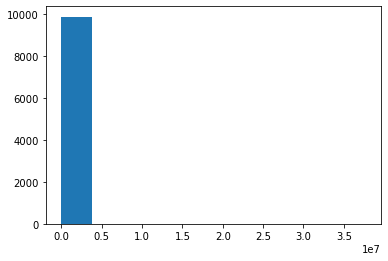

In [21]:
"""Zobaczmy jak prezentuje nasza zmienna zależna/wyjściowa - graficznie"""
plt.hist(df.solubility_mg_L)

,LogS
0,-3.616127e+00
1,-1.189237e+00
2,-2.965977e+00
3,-3.256981e+00
4,-3.328583e+00
5,-4.387683e+00
6,-1.792261e+00
7,-3.345108e+00
8,-4.425503e+00
9,-4.425503e+00


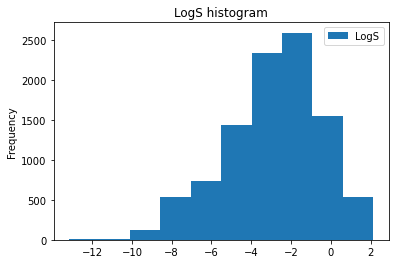

In [22]:
"""Przekształćmy naszą zmienną wyjściową - logarytm powinien zmniejszyć zakres wartości max-min, a dodatkowo,
na podstawie naszej wiedzy o problemie rozpuszczalności przekształćmy rozpuszczalność mg/L na rozpuszczalność molową (S)"""
LogS=np.log10(df.solubility_mg_L/1000/df.MolWt)
"""Zapiszmy nasz LogS w postaci obiektu DataFrame i prawdźmy ponownie jak numerycznie i graficznie prezentuje się rozkład"""
LogS=pd.DataFrame(LogS)
LogS.columns=['LogS']
LogS.describe()
LogS.plot(kind="hist", title="LogS histogram")
LogS.reset_index(inplace=True, drop=True)
LogS

In [23]:
from scipy.stats import shapiro
stat, p = shapiro(LogS)
print('Statistics=%.3f, p=%.3f' % (stat, p))

from scipy.stats import normaltest
stat, p = normaltest(LogS)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.974, p=0.000
Statistics=447.837, p=0.000


/home/adam/anaconda3/envs/DS/lib/python3.6/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [24]:
"""Wstępna przygotowanie danych można uznać za zakończone, pora stworzyć dwa obiekty zawierające zmienen niezależne (X)
oraz zalżne (Y)"""
X=df[['MolWt', 'MolLogP', 'MolMR',
       'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
       'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA',
       'LabuteASA', 'BalabanJ', 'BertzCT']]
Y=LogS

In [25]:
X
Y

,LogS
0,-3.616127e+00
1,-1.189237e+00
2,-2.965977e+00
3,-3.256981e+00
4,-3.328583e+00
5,-4.387683e+00
6,-1.792261e+00
7,-3.345108e+00
8,-4.425503e+00
9,-4.425503e+00


# Skalowanie danych oraz normalizacja

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000,9882.000000
mean,0.048622,0.391611,0.046976,0.042235,0.040506,0.042766,0.058380,0.028784,0.046763,0.030483,0.009731,0.014899,0.042052,0.051442,0.045514,0.318893,0.022515
std,0.034732,0.032103,0.032706,0.031556,0.040559,0.057330,0.052993,0.039923,0.032114,0.037311,0.029327,0.035171,0.045631,0.052039,0.034273,0.144537,0.026304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028970,0.379115,0.028570,0.025840,0.023256,0.000000,0.033708,0.007092,0.028827,0.000000,0.000000,0.000000,0.000000,0.021658,0.026590,0.267252,0.007861
50%,0.041622,0.391307,0.041310,0.036176,0.034884,0.038462,0.044944,0.021277,0.040755,0.028571,0.000000,0.000000,0.027778,0.041949,0.038607,0.337826,0.016990
75%,0.058849,0.404781,0.057729,0.051680,0.046512,0.076923,0.067416,0.035461,0.055666,0.057143,0.000000,0.033333,0.055556,0.066201,0.054703,0.403397,0.029274
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


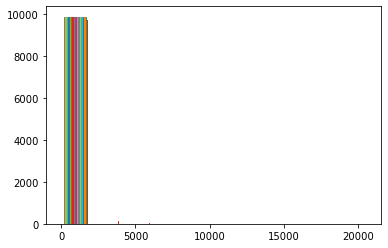

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaledX = scaler.fit_transform(X)
plt.hist(scaledX)
unscaledX = scaler.inverse_transform(scaledX)
plt.hist(unscaledX)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03,9.882000e+03
mean,-6.471245e-17,4.314164e-17,-3.767703e-16,-1.495577e-16,6.183634e-17,-2.876109e-17,-1.150444e-17,4.601774e-17,-4.314164e-18,3.738942e-17,6.327440e-17,5.176996e-17,-7.477883e-17,-8.628327e-18,-8.915938e-17,2.387170e-16,3.738942e-17
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.399985e+00,-1.219911e+01,-1.436374e+00,-1.338474e+00,-9.987364e-01,-7.459973e-01,-1.101706e+00,-7.210312e-01,-1.456218e+00,-8.170181e-01,-3.318398e-01,-4.236376e-01,-9.215982e-01,-9.885770e-01,-1.328034e+00,-2.206414e+00,-8.559763e-01
25%,-5.658437e-01,-3.892843e-01,-5.627865e-01,-5.195784e-01,-4.253276e-01,-7.459973e-01,-4.655939e-01,-5.433757e-01,-5.585260e-01,-8.170181e-01,-3.318398e-01,-4.236376e-01,-9.215982e-01,-5.723745e-01,-5.521562e-01,-3.573071e-01,-5.570976e-01
50%,-2.015491e-01,-9.491802e-03,-1.732550e-01,-1.920203e-01,-1.386231e-01,-7.508855e-02,-2.535565e-01,-1.880646e-01,-1.870670e-01,-5.122346e-02,-3.318398e-01,-4.236376e-01,-3.128259e-01,-1.824418e-01,-2.015393e-01,1.309948e-01,-2.100331e-01
75%,2.944597e-01,4.102381e-01,3.287879e-01,2.993169e-01,1.480813e-01,5.958202e-01,1.705182e-01,1.672465e-01,2.772566e-01,7.145712e-01,-3.318398e-01,5.241521e-01,2.959464e-01,2.836100e-01,2.681267e-01,5.846779e-01,2.569747e-01
max,2.739332e+01,1.895196e+01,2.914022e+01,3.035278e+01,2.365784e+01,1.669763e+01,1.776962e+01,2.432840e+01,2.968442e+01,2.598580e+01,3.376772e+01,2.801005e+01,2.099420e+01,1.822858e+01,2.785076e+01,4.712561e+00,3.716258e+01


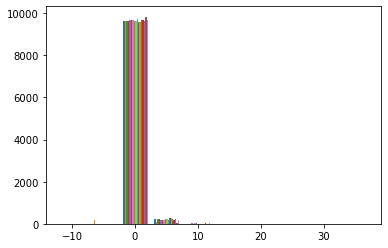

In [27]:
scalerStd = StandardScaler()
standardizedX = scalerStd.fit_transform(X)
plt.hist(standardizedX)
pd.DataFrame(standardizedX).describe()

# Przekształcenie regresji na klasyfikację. Kiedy i na co uważać!!!

Kiedy ma to sens i uzasadnienie? 

Dla naszego przykładu oprzemy się o wytyczne/regulacje obowiązujące w farmacji (FP PL/EU)

Definicja
Ile mL do rozp 1 g = 1000 g do rozp x/1000

In [28]:
pd.options.display.max_rows = 10
Solubility_FP_class=1000/(df.solubility_mg_L/1000)

In [29]:
"""Ile mL rozpuszczalnika do rozpuszczenia 1 g substancji"""

Solubility_FP=1000/(df.solubility_mg_L/1000)
df["Solubility_mL_1g"]=Solubility_FP
df

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L,Solubility_mL_1g
0,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.95810,102.4454,23.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000,210.377334,95.000000,10526.315790
101,2-methyl-N-[(2-methylprop-2-enamido)methyl]pro...,InChI=1S/C9H14N2O2/c1-6(2)8(12)10-5-11-9(13)7(...,TURITJIWSQEMDB-UHFFFAOYSA-N,CC(=C)C(=O)NCNC(=O)C(C)=C,182.223,0.32850,50.7804,13.0,2.0,2.0,...,0.0,0.0,0.0,0.0,58.20,77.702350,3.689373,230.340316,11786.000001,84.846428
102,"(1Z,5Z)-cycloocta-1,5-diene","InChI=1S/C8H12/c1-2-4-6-8-7-5-3-1/h1-2,7-8H,3-...",VYXHVRARDIDEHS-QGTKBVGQSA-N,C\1C\C=C/CC\C=C1,108.184,2.67280,36.7480,8.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.00,50.908809,2.285714,72.605938,117.000000,8547.008547
103,(3-isocyanatopropyl)trimethoxysilane,"InChI=1S/C7H15NO4Si/c1-10-13(11-2,12-3)6-4-5-8...",FMGBDYLOANULLW-UHFFFAOYSA-N,CO[Si](CCCN=C=O)(OC)OC,205.286,0.59040,49.1935,13.0,5.0,0.0,...,0.0,0.0,0.0,0.0,57.12,79.077357,3.873429,169.066693,113.600000,8802.816902
104,(3-chloropropyl)triethoxysilane,"InChI=1S/C9H21ClO3Si/c1-4-11-14(12-5-2,13-6-3)...",KSCAZPYHLGGNPZ-UHFFFAOYSA-N,CCO[Si](CCCCl)(OCC)OCC,240.803,2.66370,60.7760,14.0,3.0,0.0,...,0.0,0.0,0.0,0.0,27.69,93.053663,4.210670,118.205924,113.000000,8849.557522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,264.369,2.61700,78.6762,19.0,4.0,1.0,...,1.0,0.0,0.0,1.0,41.57,115.300645,2.394548,374.236893,258.351227,3870.699637
9978,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,444.440,-0.21440,109.5409,32.0,9.0,6.0,...,1.0,0.0,3.0,4.0,181.62,182.429237,2.047922,1148.584975,522.171469,1915.079737
9979,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,150.221,2.82402,46.9328,11.0,1.0,1.0,...,1.0,0.0,0.0,1.0,20.23,67.685405,3.092720,251.049732,969.908239,1031.025369
9980,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,454.611,5.09308,131.6560,33.0,6.0,0.0,...,2.0,0.0,0.0,2.0,63.95,198.569223,2.023333,938.203977,47.603616,21006.807711


In [30]:
zakres = [0, 1, 10, 30, 100, 1000, 10000, np.inf]
nazwy = ['b. łatwo rozpuszczalny', 'łatwo rozpuszczalny', 'rozpuszczalny', 'dość trudno rozpuszczalny',
         'trudno rozpuszczalny', 'bardzo trudno rozpuszczalny', 'praktycznie nierozpuszczalny']

df['Solubility_FP_class'] = pd.cut(df['Solubility_mL_1g'], zakres, labels=nazwy)
df

,Name,InChI,InChIKey,SMILES,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,...,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,solubility_mg_L,Solubility_mL_1g,Solubility_FP_class
0,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,392.510,3.95810,102.4454,23.0,0.0,0.0,...,0.0,0.0,0.0,0.00,158.520601,0.000000,210.377334,95.000000,10526.315790,praktycznie nierozpuszczalny
101,2-methyl-N-[(2-methylprop-2-enamido)methyl]pro...,InChI=1S/C9H14N2O2/c1-6(2)8(12)10-5-11-9(13)7(...,TURITJIWSQEMDB-UHFFFAOYSA-N,CC(=C)C(=O)NCNC(=O)C(C)=C,182.223,0.32850,50.7804,13.0,2.0,2.0,...,0.0,0.0,0.0,58.20,77.702350,3.689373,230.340316,11786.000001,84.846428,dość trudno rozpuszczalny
102,"(1Z,5Z)-cycloocta-1,5-diene","InChI=1S/C8H12/c1-2-4-6-8-7-5-3-1/h1-2,7-8H,3-...",VYXHVRARDIDEHS-QGTKBVGQSA-N,C\1C\C=C/CC\C=C1,108.184,2.67280,36.7480,8.0,0.0,0.0,...,0.0,1.0,1.0,0.00,50.908809,2.285714,72.605938,117.000000,8547.008547,bardzo trudno rozpuszczalny
103,(3-isocyanatopropyl)trimethoxysilane,"InChI=1S/C7H15NO4Si/c1-10-13(11-2,12-3)6-4-5-8...",FMGBDYLOANULLW-UHFFFAOYSA-N,CO[Si](CCCN=C=O)(OC)OC,205.286,0.59040,49.1935,13.0,5.0,0.0,...,0.0,0.0,0.0,57.12,79.077357,3.873429,169.066693,113.600000,8802.816902,bardzo trudno rozpuszczalny
104,(3-chloropropyl)triethoxysilane,"InChI=1S/C9H21ClO3Si/c1-4-11-14(12-5-2,13-6-3)...",KSCAZPYHLGGNPZ-UHFFFAOYSA-N,CCO[Si](CCCCl)(OCC)OCC,240.803,2.66370,60.7760,14.0,3.0,0.0,...,0.0,0.0,0.0,27.69,93.053663,4.210670,118.205924,113.000000,8849.557522,bardzo trudno rozpuszczalny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,tetracaine,InChI=1S/C15H24N2O2/c1-4-5-10-16-14-8-6-13(7-9...,GKCBAIGFKIBETG-UHFFFAOYSA-N,C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C,264.369,2.61700,78.6762,19.0,4.0,1.0,...,0.0,0.0,1.0,41.57,115.300645,2.394548,374.236893,258.351227,3870.699637,bardzo trudno rozpuszczalny
9978,tetracycline,InChI=1S/C22H24N2O8/c1-21(31)8-5-4-6-11(25)12(...,OFVLGDICTFRJMM-WESIUVDSSA-N,OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...,444.440,-0.21440,109.5409,32.0,9.0,6.0,...,0.0,3.0,4.0,181.62,182.429237,2.047922,1148.584975,522.171469,1915.079737,bardzo trudno rozpuszczalny
9979,thymol,InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...,MGSRCZKZVOBKFT-UHFFFAOYSA-N,c1(cc(ccc1C(C)C)C)O,150.221,2.82402,46.9328,11.0,1.0,1.0,...,0.0,0.0,1.0,20.23,67.685405,3.092720,251.049732,969.908239,1031.025369,bardzo trudno rozpuszczalny
9980,verapamil,"InChI=1S/C27H38N2O4/c1-20(2)27(19-28,22-10-12-...",SGTNSNPWRIOYBX-UHFFFAOYSA-N,COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...,454.611,5.09308,131.6560,33.0,6.0,0.0,...,0.0,0.0,2.0,63.95,198.569223,2.023333,938.203977,47.603616,21006.807711,praktycznie nierozpuszczalny


In [31]:
df.columns

Index(['Name', 'InChI', 'InChIKey', 'SMILES', 'MolWt', 'MolLogP', 'MolMR',
       'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'NumValenceElectrons', 'NumAromaticRings',
       'NumSaturatedRings', 'NumAliphaticRings', 'RingCount', 'TPSA',
       'LabuteASA', 'BalabanJ', 'BertzCT', 'solubility_mg_L',
       'Solubility_mL_1g', 'Solubility_FP_class'],
      dtype='object')

In [32]:
df_class=df.drop(['Name', 'InChI', 'InChIKey', 'SMILES', 'solubility_mg_L', 'Solubility_mL_1g'], axis=1)
df_class
df_class.Solubility_FP_class.describe()
df_class.Solubility_FP_class.value_counts()

praktycznie nierozpuszczalny    3644
trudno rozpuszczalny            1833
bardzo trudno rozpuszczalny     1780
łatwo rozpuszczalny             1071
dość trudno rozpuszczalny        771
rozpuszczalny                    544
b. łatwo rozpuszczalny           239
Name: Solubility_FP_class, dtype: int64

In [33]:
df["solubility_mg_L"].mean()

101244.2628322735

# Generowanie nowych danych

Tworzenie nowych danych - w naszym przypadku zastosujemy tzw. deskryptory molekularne i pakiet mordred. Z innych metod można zastosować tzw. odicski palca molekuł (ang. fingerprints)

In [40]:
from mordred import Calculator, descriptors
from rdkit import Chem

smiles=df["SMILES"]
mols = [Chem.MolFromSmiles(s) for s in smiles]
calc=Calculator(descriptors, ignore_3D=False)
new_desc=calc.pandas(mols)
new_desc

RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:11] WARNING: not r

/home/adam/anaconda3/envs/DS/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/adam/anaconda3/envs/DS/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  0%|          | 30/9882 [00:05<36:12,  4.53it/s]  

/home/adam/anaconda3/envs/DS/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/adam/anaconda3/envs/DS/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 69/9882 [00:07<11:24, 14.33it/s]

/home/adam/anaconda3/envs/DS/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|          | 80/9882 [00:09<29:04,  5.62it/s]

/home/adam/anaconda3/envs/DS/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  1%|▏         | 133/9882 [00:11<09:24, 17.28it/s]

/home/adam/anaconda3/envs/DS/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  2%|▏         | 187/9882 [00:16<09:02, 17.88it/s]RDKit WARNING: [16:39:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:28] WARNING: not removing hydrogen atom without neighbors
  3%|▎         | 309/9882 [00:25<24:17,  6.57it/s]RDKit WARNING: [16:39:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:38] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:38] WARNING: not removing hydrogen atom without neighbors
  3%|▎         | 319/9882 [00:26<09:01, 17.67it/s]

/home/adam/anaconda3/envs/DS/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  5%|▌         | 507/9882 [00:40<16:01,  9.75it/s]RDKit WARNING: [16:39:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:52] WARNING: not removing hydrogen atom without neighbors
  6%|▌         | 574/9882 [00:44<08:15, 18.77it/s]RDKit WARNING: [16:39:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:57] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:39:57] WARNING: not removing hydrogen atom without neighbors
  7%|▋         | 673/9882 [00:50<06:38, 23.09it/s]RDKit WARNING: [16:40:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:40:03] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:40:03] WARNING: not removing hydrogen atom without neighbors
  7%|▋         | 724/9882 [00:54<12:13, 12.48it/s]RDKit WARNING: [16:40:07] WARNING: not removing hydrogen atom without neighbors


 22%|██▏       | 2150/9882 [03:34<24:19,  5.30it/s]RDKit WARNING: [16:42:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:42:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:42:47] WARNING: not removing hydrogen atom without neighbors
 22%|██▏       | 2190/9882 [03:35<08:38, 14.83it/s]RDKit WARNING: [16:42:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:42:47] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:42:47] WARNING: not removing hydrogen atom without neighbors
 23%|██▎       | 2308/9882 [03:41<05:34, 22.63it/s]RDKit WARNING: [16:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:42:54] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:42:54] WARNING: not removing

 57%|█████▋    | 5596/9882 [08:16<11:32,  6.19it/s]RDKit WARNING: [16:47:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:47:29] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:47:29] WARNING: not removing hydrogen atom without neighbors
 61%|██████▏   | 6076/9882 [09:00<08:54,  7.12it/s]RDKit WARNING: [16:48:13] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:48:13] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:48:13] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:48:13] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:48:13] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:48:13] WARNING: not removing hydrogen atom without neighbors
100%|██████████| 9882/9882 [15:43<00:00, 10.47it/s]


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,15.325998,11.908140,1,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,8.878079,54.228660,391.281363,5.670744,2200001716,19,88.0,86.0,divide by zero encountered in power (mZagreb1),5.375000
1,9.060740,9.027964,0,0,14.4243,2.13578,4.27156,14.4243,1.10956,3.40131,...,8.710290,42.445370,182.105528,6.744649,296,14,54.0,56.0,7.19444,3.055556
2,5.656854,4.898979,0,0,9.65685,2,4,9.65685,1.20711,2.95684,...,7.685703,33.849983,108.093900,5.404695,64,8,32.0,32.0,2,2.000000
3,8.485281,8.852607,0,0,15.5755,2.25754,4.51509,15.5755,1.19811,3.39587,...,8.920656,42.702008,205.077034,7.324180,284,16,52.0,56.0,6.0625,3.500000
4,9.192388,9.631316,0,0,16.3679,2.29203,4.58407,16.3679,1.16913,3.46953,...,9.028459,44.089117,240.094849,6.859853,320,17,56.0,60.0,6.3125,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9877,13.722758,11.378360,0,1,23.141,2.27741,4.55483,23.141,1.21795,3.81119,...,9.259987,50.798888,264.183778,6.143809,892,22,84.0,90.0,7.19444,4.527778
9878,25.416672,21.303532,0,1,38.9896,2.67619,5.35237,38.9896,1.21842,4.41965,...,11.001783,69.521365,444.153266,7.931308,2350,76,186.0,239.0,14.6806,6.666667
9879,8.134854,7.770338,0,0,12.6752,2.30278,4.60555,12.6752,1.15229,3.29467,...,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.19444,2.472222
9880,24.165701,19.978681,0,1,41.7424,2.45383,4.90767,41.7424,1.26492,4.38522,...,10.336860,68.825439,454.283158,6.398354,3698,55,160.0,187.0,12.9514,7.888889


In [41]:
new_desc

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,15.325998,11.908140,1,1,multiple fragments (SpAbs_A/SpAbs),multiple fragments (SpMax_A/SpMax),multiple fragments (SpDiam_A/SpDiam),multiple fragments (SpAD_A/SpAD),multiple fragments (SpMAD_A/SpMAD),multiple fragments (LogEE_A/LogEE),...,8.878079,54.228660,391.281363,5.670744,2200001716,19,88.0,86.0,divide by zero encountered in power (mZagreb1),5.375000
1,9.060740,9.027964,0,0,14.4243,2.13578,4.27156,14.4243,1.10956,3.40131,...,8.710290,42.445370,182.105528,6.744649,296,14,54.0,56.0,7.19444,3.055556
2,5.656854,4.898979,0,0,9.65685,2,4,9.65685,1.20711,2.95684,...,7.685703,33.849983,108.093900,5.404695,64,8,32.0,32.0,2,2.000000
3,8.485281,8.852607,0,0,15.5755,2.25754,4.51509,15.5755,1.19811,3.39587,...,8.920656,42.702008,205.077034,7.324180,284,16,52.0,56.0,6.0625,3.500000
4,9.192388,9.631316,0,0,16.3679,2.29203,4.58407,16.3679,1.16913,3.46953,...,9.028459,44.089117,240.094849,6.859853,320,17,56.0,60.0,6.3125,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9877,13.722758,11.378360,0,1,23.141,2.27741,4.55483,23.141,1.21795,3.81119,...,9.259987,50.798888,264.183778,6.143809,892,22,84.0,90.0,7.19444,4.527778
9878,25.416672,21.303532,0,1,38.9896,2.67619,5.35237,38.9896,1.21842,4.41965,...,11.001783,69.521365,444.153266,7.931308,2350,76,186.0,239.0,14.6806,6.666667
9879,8.134854,7.770338,0,0,12.6752,2.30278,4.60555,12.6752,1.15229,3.29467,...,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,5.19444,2.472222
9880,24.165701,19.978681,0,1,41.7424,2.45383,4.90767,41.7424,1.26492,4.38522,...,10.336860,68.825439,454.283158,6.398354,3698,55,160.0,187.0,12.9514,7.888889


In [42]:
new_desc.to_csv("new_desc_raw_solubility.csv", index=False)

In [43]:
new_desc = new_desc.select_dtypes(exclude=['object'])
new_desc

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,15.325998,11.908140,1,1,0,0,69,23,0,0,...,0.0,8.878079,54.228660,391.281363,5.670744,2200001716,19,88.0,86.0,5.375000
1,9.060740,9.027964,0,0,0,0,27,13,0,0,...,0.0,8.710290,42.445370,182.105528,6.744649,296,14,54.0,56.0,3.055556
2,5.656854,4.898979,0,0,0,0,20,8,0,0,...,0.0,7.685703,33.849983,108.093900,5.404695,64,8,32.0,32.0,2.000000
3,8.485281,8.852607,0,0,0,0,28,13,0,0,...,0.0,8.920656,42.702008,205.077034,7.324180,284,16,52.0,56.0,3.500000
4,9.192388,9.631316,0,0,0,0,35,14,0,0,...,0.0,9.028459,44.089117,240.094849,6.859853,320,17,56.0,60.0,3.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9877,13.722758,11.378360,0,1,6,6,43,19,0,0,...,0.0,9.259987,50.798888,264.183778,6.143809,892,22,84.0,90.0,4.527778
9878,25.416672,21.303532,0,1,6,6,56,32,0,0,...,0.0,11.001783,69.521365,444.153266,7.931308,2350,76,186.0,239.0,6.666667
9879,8.134854,7.770338,0,0,6,6,25,11,0,0,...,0.0,9.094144,41.023148,150.104465,6.004179,150,14,52.0,58.0,2.472222
9880,24.165701,19.978681,0,1,12,12,71,33,0,0,...,0.0,10.336860,68.825439,454.283158,6.398354,3698,55,160.0,187.0,7.888889


# Co dalej?